In [46]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Dropout


In [47]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [48]:
X_test.shape

(10000, 28, 28)

In [49]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

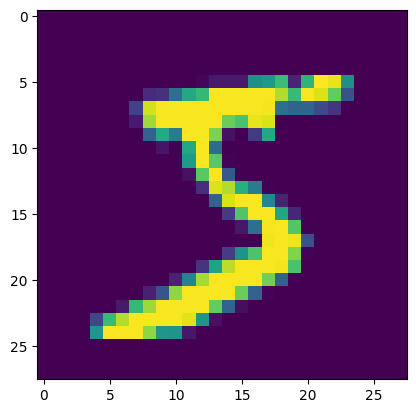

In [50]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])


In [51]:
X_train = X_train/255
X_test = X_test/255

In [52]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Drop 30% neurons
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Drop 30% neurons
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [55]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6920 - loss: 0.9368 - val_accuracy: 0.9379 - val_loss: 0.2115
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8995 - loss: 0.3493 - val_accuracy: 0.9535 - val_loss: 0.1657
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9176 - loss: 0.2877 - val_accuracy: 0.9537 - val_loss: 0.1627
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9284 - loss: 0.2501 - val_accuracy: 0.9607 - val_loss: 0.1376
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9354 - loss: 0.2221 - val_accuracy: 0.9635 - val_loss: 0.1334
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9397 - loss: 0.2094 - val_accuracy: 0.9628 - val_loss: 0.1308
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9403 - loss: 0.2000 - val_accuracy: 0.9654 - val_loss: 0.1244
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9436 - loss: 0.1931 -

In [56]:
y_Prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [57]:
y_pred = y_Prob.argmax(axis=1)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9716

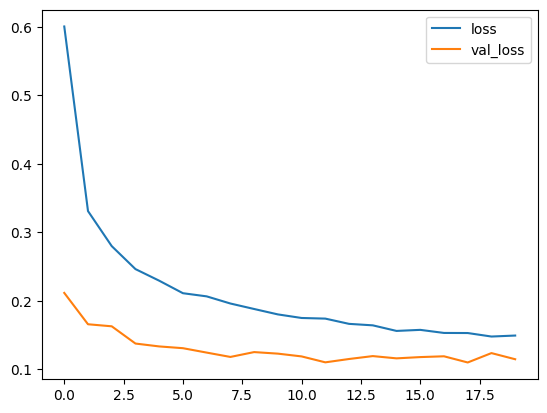

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

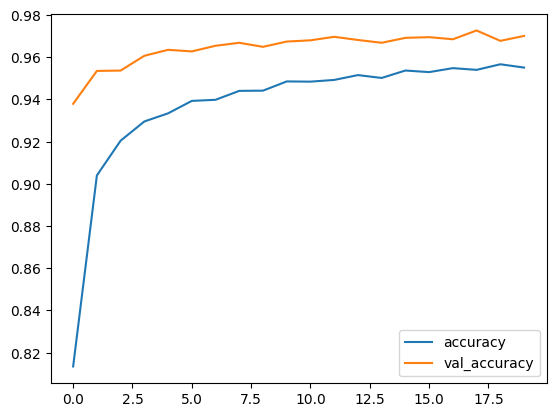

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])